# Big Mart Sales Prediction

### Importing required Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing the dataset

In [2]:
# training csv file
df_train = pd.read_csv('D:/Analytics_Vidhya/NeuralNetwork/BigMartSales/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df_train.shape

(8523, 12)

In [14]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item Visibility cannot be 0 , we will replace it with mean Visibility

In [52]:
df_train[df_train['Item_Visibility']==0.0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [53]:
# at first droping item identifier , outlet_identifier
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [54]:
print('list of the columns is {}\n and modified shape is {}\n'.format(df_train.columns,df_train.shape))

list of the columns is Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
 and modified shape is (8523, 10)



In [56]:
df_train['Outlet_Age']=df_train['Outlet_Establishment_Year'].max() - df_train['Outlet_Establishment_Year']

In [57]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,10
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,11
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,22
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,22
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850,7
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,5
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0


In [58]:
df_train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

In [59]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [60]:
df_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [61]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [63]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})
#df_train['Item_Visibility'] = df_train['Item_Visibility'].replace()

In [65]:
#df=df.mask(df==0).fillna(df.mean())
df_train['Item_Visibility']=df_train['Item_Visibility'].mask(df_train['Item_Visibility']==0.0)#.fillna(df.mean())

In [68]:
df_train.isna().sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Outlet_Age                     0
dtype: int64

df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].map({'reg':'Regular','LF':'Low Fat'})

In [70]:
df_train['Item_Visibility'].fillna(df_train['Item_Visibility'].mean(),inplace=True)

In [71]:
df_train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [72]:
# at first droping item identifier , outlet_identifier
df_train = df_train.drop(['Outlet_Establishment_Year'],axis=1)

In [73]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

df_train['Item_Fat_Content'].unique()

df_train['Item_Fat_Content'].value_counts()

In [74]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df_train['Item_Fat_Content']=label_encoder.fit_transform(df_train['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
df_train['Outlet_Size']=label_encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=label_encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=label_encoder.fit_transform(df_train['Outlet_Type'])
df_train['Item_Type']=label_encoder.fit_transform(df_train['Item_Type'])
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,10
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,0
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,10
3,19.20,1,0.070482,6,182.0950,1,2,0,732.3800,11
4,8.93,0,0.070482,9,53.8614,0,2,1,994.7052,22


In [76]:
df_train.corr(method='pearson')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.011550,0.008301
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.000622,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.017763,0.049915,1.000000,-0.035922,-0.005515,0.072297,-0.027742,-0.179380,-0.134035,0.078316
Item_Type,0.028015,-0.139434,-0.035922,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048,-0.004970
Item_MRP,0.024756,0.006063,-0.005515,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Size,-0.007225,-0.000622,0.072297,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367,0.089216
Outlet_Type,-0.000566,0.002199,-0.179380,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522,0.122304
Item_Outlet_Sales,0.011550,0.018719,-0.134035,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000,0.049135
Outlet_Age,0.008301,-0.003151,0.078316,-0.004970,-0.005020,-0.193389,0.089216,0.122304,0.049135,1.000000


<AxesSubplot:>

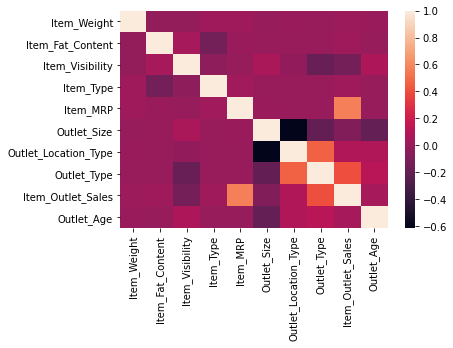

In [77]:
correlations = df_train.corr(method='pearson')
sns.heatmap(correlations)

In [78]:
X_train= df_train.iloc[:,0:-1]
X_train.corr(method='pearson')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.017763,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.017763,0.049915,1.000000,-0.035922,-0.005515,0.072297,-0.027742,-0.179380,-0.134035
Item_Type,0.028015,-0.139434,-0.035922,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.005515,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574
Outlet_Size,-0.007225,-0.000622,0.072297,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.027742,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.179380,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.134035,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000


In [79]:
y_train=df_train['Item_Outlet_Sales']

In [80]:
print("X_train shape is {} \nand y_train shape is {} \n".format(X_train.shape,y_train.shape))

X_train shape is (8523, 9) 
and y_train shape is (8523,) 



In [81]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)

In [82]:
X_train.shape

(8523, 9)

In [92]:
### Applying the same transformation on
df_test = pd.read_csv('D:/Analytics_Vidhya/NeuralNetwork/BigMartSales/test.csv')
df_test.head()                  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [93]:
df_test.shape

(5681, 11)

In [94]:
df_test = df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [95]:
df_test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [96]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [97]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [102]:
df_test['Item_Visibility']=df_test['Item_Visibility'].mask(df_test['Item_Visibility']) 
df_test

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
df_test['Item_Fat_Content'].value_counts()

In [ ]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'reg':'Regular', 'LF':'Low Fat','low fat':'Low Fat'})

In [ ]:
df_test['Item_Fat_Content'].value_counts()

In [ ]:
X_test = df_test
print("X_test shape is {}\n".format(X_test.shape))

In [ ]:
# Import label encoder 
# from sklearn import preprocessing
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'Country'. 
df_test['Item_Fat_Content']=label_encoder.fit_transform(df_test['Item_Fat_Content']) 
#,'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'
df_test['Outlet_Size']=label_encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']=label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']=label_encoder.fit_transform(df_test['Outlet_Type'])
df_test['Item_Type']=label_encoder.fit_transform(df_test['Item_Type'])
df_test.head()

In [ ]:
# scaling X_test
X_test=min_max_scaler.fit_transform(X_test)

In [ ]:
X_test[:5]

In [83]:
from keras.models import Sequential
# importing different layers from keras
from keras.layers import InputLayer, Dense
from keras.optimizers import Adam,RMSprop

Using TensorFlow backend.


In [85]:
# defining input neurons
input_neurons = X_train.shape[1]

In [86]:
# define number of output neurons
output_neurons = 1

In [103]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
#model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))

In [105]:
learning_rate = 0.01
opt=RMSprop(lr=learning_rate)
#model.compile(loss='MSE', optimizer='Adam',metrics=['MAE'])
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32,validation_split = 0.2, verbose=1)

Train on 6818 samples, validate on 1705 samples
Epoch 1/200
6818/6818 [==============================] - 0s 50us/step - loss: 7118.3904 - mae: 66.2006 - val_loss: 44.2486 - val_mae: 4.9049
Epoch 2/200
6818/6818 [==============================] - 0s 49us/step - loss: 7153.7868 - mae: 59.4769 - val_loss: 2368.1934 - val_mae: 45.6147
Epoch 3/200
6818/6818 [==============================] - 0s 49us/step - loss: 6904.6633 - mae: 62.1725 - val_loss: 4402.1918 - val_mae: 63.1361
Epoch 4/200
6818/6818 [==============================] - 0s 48us/step - loss: 7234.6197 - mae: 69.8689 - val_loss: 194.1544 - val_mae: 12.6155
Epoch 5/200
6818/6818 [==============================] - 0s 47us/step - loss: 6740.8701 - mae: 58.3594 - val_loss: 11177.2135 - val_mae: 95.2008
Epoch 6/200
6818/6818 [==============================] - 0s 46us/step - loss: 6833.2443 - mae: 62.8844 - val_loss: 10049.6041 - val_mae: 92.7610
Epoch 7/200
6818/6818 [==============================] - 0s 49us/step - loss: 7060.7399 - 

6818/6818 [==============================] - 0s 50us/step - loss: 5414.3122 - mae: 53.8243 - val_loss: 3599.4741 - val_mae: 55.9709
Epoch 58/200
6818/6818 [==============================] - 0s 49us/step - loss: 5354.5735 - mae: 56.2365 - val_loss: 19639.3030 - val_mae: 129.9384
Epoch 59/200
6818/6818 [==============================] - 0s 62us/step - loss: 5413.6431 - mae: 56.5626 - val_loss: 9655.4249 - val_mae: 90.2924
Epoch 60/200
6818/6818 [==============================] - 0s 63us/step - loss: 5676.1864 - mae: 60.5486 - val_loss: 126.9185 - val_mae: 8.8866
Epoch 61/200
6818/6818 [==============================] - 0s 51us/step - loss: 5266.9561 - mae: 51.3876 - val_loss: 238.9542 - val_mae: 14.2830
Epoch 62/200
6818/6818 [==============================] - 0s 45us/step - loss: 5386.7593 - mae: 53.2651 - val_loss: 26.3166 - val_mae: 3.9840
Epoch 63/200
6818/6818 [==============================] - 0s 48us/step - loss: 5304.1973 - mae: 48.2187 - val_loss: 5554.6102 - val_mae: 67.4871
Ep

Epoch 114/200
6818/6818 [==============================] - 0s 44us/step - loss: 4460.5815 - mae: 51.2752 - val_loss: 196.6008 - val_mae: 11.8860
Epoch 115/200
6818/6818 [==============================] - 0s 51us/step - loss: 4518.5037 - mae: 49.8233 - val_loss: 227.4096 - val_mae: 12.4203
Epoch 116/200
6818/6818 [==============================] - 0s 49us/step - loss: 4464.7465 - mae: 45.1578 - val_loss: 107.2184 - val_mae: 8.9628
Epoch 117/200
6818/6818 [==============================] - 0s 49us/step - loss: 4551.2955 - mae: 50.2865 - val_loss: 66.5630 - val_mae: 6.1098
Epoch 118/200
6818/6818 [==============================] - 0s 53us/step - loss: 4314.5279 - mae: 46.9249 - val_loss: 117.3335 - val_mae: 7.3812
Epoch 119/200
6818/6818 [==============================] - 0s 47us/step - loss: 4428.2167 - mae: 50.9179 - val_loss: 703.5576 - val_mae: 23.3058
Epoch 120/200
6818/6818 [==============================] - 0s 48us/step - loss: 4391.8078 - mae: 50.0342 - val_loss: 74.5523 - val_mae

6818/6818 [==============================] - 0s 51us/step - loss: 3538.4356 - mae: 39.0179 - val_loss: 384.7247 - val_mae: 15.9507
Epoch 171/200
6818/6818 [==============================] - 0s 46us/step - loss: 3670.4020 - mae: 42.3937 - val_loss: 94.1118 - val_mae: 8.2011
Epoch 172/200
6818/6818 [==============================] - 0s 50us/step - loss: 3448.3745 - mae: 39.1176 - val_loss: 18745.6188 - val_mae: 122.3889
Epoch 173/200
6818/6818 [==============================] - 0s 47us/step - loss: 3700.1830 - mae: 46.2867 - val_loss: 322.1643 - val_mae: 13.7465
Epoch 174/200
6818/6818 [==============================] - 0s 67us/step - loss: 3741.0073 - mae: 42.6459 - val_loss: 32.0693 - val_mae: 4.2431
Epoch 175/200
6818/6818 [==============================] - 0s 62us/step - loss: 3579.3409 - mae: 40.7978 - val_loss: 82.2778 - val_mae: 7.4629
Epoch 176/200
6818/6818 [==============================] - 0s 53us/step - loss: 3641.5470 - mae: 41.6035 - val_loss: 37.3442 - val_mae: 4.8231
Epoc

In [110]:
model.evaluate(X_train,y_train)

8523/8523 [==============================] - 0s 23us/step


[23.761798902505106, 3.6878461837768555]

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

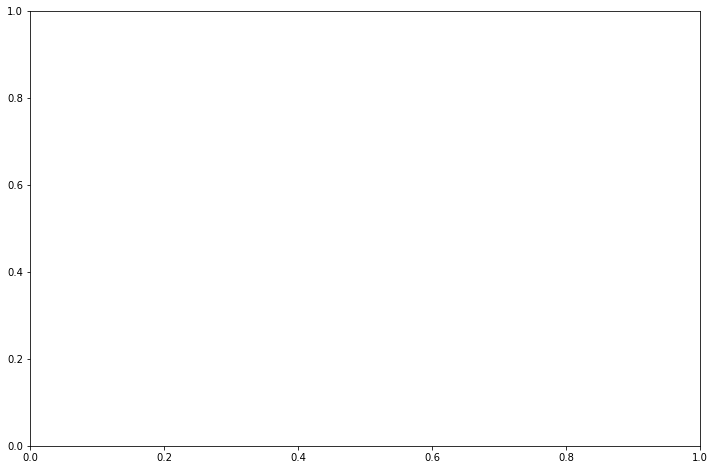

In [111]:
# plot the training loss and accuracy
N = np.arange(0, 100)
#plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
#plt.figure(figure)
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and Mean Absolute Error on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend(loc="upper right")
#plt.savefig(args["plot"])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions